# Trabalho Prático - Stroke Prediction Dataset

## Basic Imports

In [1]:
from numpy import outer
import pandas as pd
from pyparsing import col
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Dataset Read & Description


1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not

In [2]:
df = pd.read_csv('Datasets/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Dataset Exploration & Treatment

### Charts

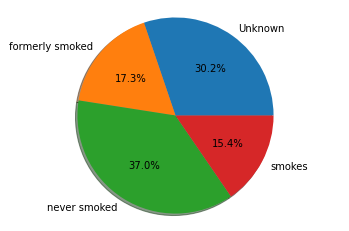

In [3]:
labels = df['smoking_status'].astype('category').cat.categories.tolist()
counts = df['smoking_status'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_aspect(aspect='auto')
fig1.set_facecolor(color='white')
ax1.axis('equal')
plt.show()

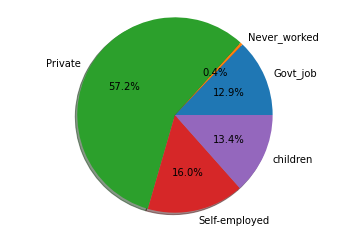

In [4]:
labels = df['work_type'].astype('category').cat.categories.tolist()
counts = df['work_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_aspect(aspect='auto')
fig1.set_facecolor(color='white')
ax1.axis('equal')
plt.show()

### Correlation Matrix


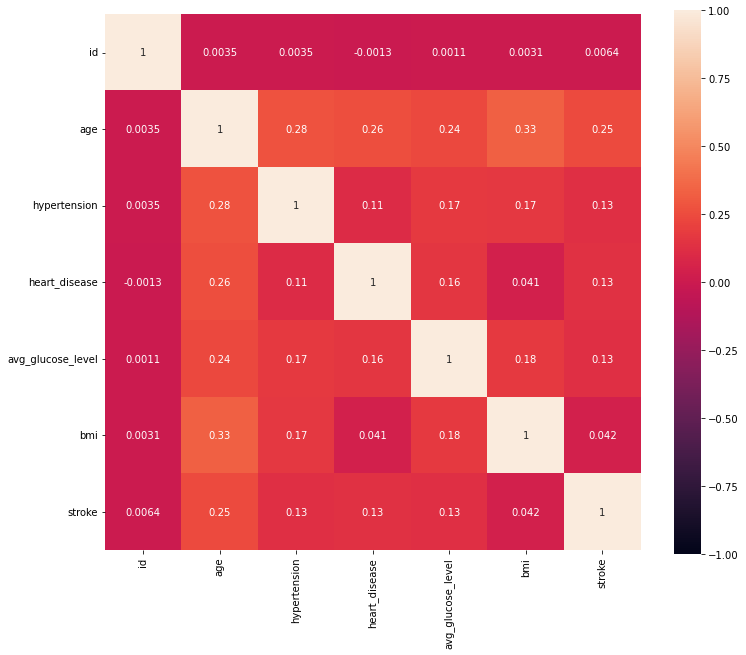

In [5]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, square = True , annot=True)
plt.show()

From the correlation matrix, we can see that there is neither a negative or positive strong correlation between any of the features presented. Besides that, looking at the matrix, we can see that age has some influence in all relevant features (related to health)

### Info 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Duplicates

 Check Duplicates

In [7]:
df.duplicated().sum()

0

No treatment needed to be done.

### Missing Values

Get number of missing values

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filled with the mean values since ater evaluation, with the mean, we dont disturb the data as much as we would if we dropped these rows. 

In [9]:
mean = df['bmi'].mean()
df['bmi'].fillna(value=mean,inplace=True)   

### Unique Values


Number of Unique Values


In [10]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

Looking at the number of unique values, we can see that some of these features need to be futher investigated, so that we can tell more about the type of values and relevance of each one.


#### ever_married

In [11]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
df.groupby(by=['ever_married']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36117.673307,22.014229,0.030165,0.018213,96.44815,25.323590,0.016505
Yes,36727.514465,54.342082,0.132717,0.072771,111.23031,30.763761,0.065613


In [13]:
df.groupby(by=['ever_married']).median()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36204,18.0,0,0,89.04,23.8,0
Yes,37132,54.0,0,0,93.55,29.3,0


'ever_married is a binary feature, in this case, through the values that are observed we can state that there are visible differences between the categories, so we keep this feature because it can differenciate entries.

#### Residence_type

In [14]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [15]:
df.groupby(by=['Residence_type']).mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,36547.998011,42.900811,0.099841,0.053302,106.375235,28.894176,0.045346
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892328,0.052003


In [16]:
df.groupby(by=['Residence_type']).median()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,37211.0,44.0,0.0,0.0,92.955,28.4,0.0
Urban,36568.5,45.0,0.0,0.0,90.770,28.3,0.0


Residence type should be dropped because the values don't vary significantly from each category, so no distinction/prediction can be made from this feature.

In [17]:
df.drop(['Residence_type'], axis=1, inplace = True)


#### id

id is and identificator for each entry (row) of the table, so its not a relevant feature for the objective of the ML model.

In [18]:
df.drop(['id'], axis=1, inplace = True)

#### gender


In [19]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
df.groupby(by=['gender']).mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.757395,0.092184,0.037742,104.057809,29.060168,0.047094
Male,42.483385,0.104965,0.077069,109.088520,28.659998,0.051064
Other,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [21]:
df.groupby(by=['gender']).median()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,44.0,0,0,90.755,28.1,0
Male,46.0,0,0,93.550,28.7,0
Other,26.0,0,0,143.330,22.4,0


Gender should be used, although, looking at the statistics there are distinguishable differences between genders on somes features.

### Metrics

- 'avg_glucose_level' Variance: 

In [22]:
df['avg_glucose_level'].var()

2050.600819911376

- 'bmi' Variance:

In [23]:
df['bmi'].var()

59.25947846260943

- 'heart_disease' Variance: 

In [24]:
df['heart_disease'].var()

0.051104474318946755

In [25]:
df['hypertension'].var()

0.08797551920003031

#### Dispersion

In [26]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

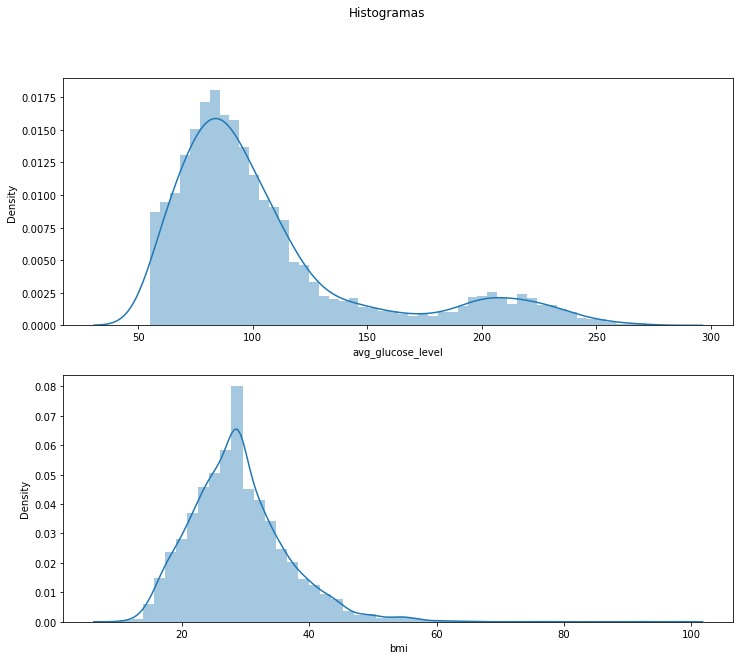

In [27]:
    
fig, axs = plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Histogramas')
sns.distplot(df['avg_glucose_level'],ax = axs[0])   
sns.distplot(df['bmi'],ax=axs[1])

### Outliers

#### avg_glucose_level

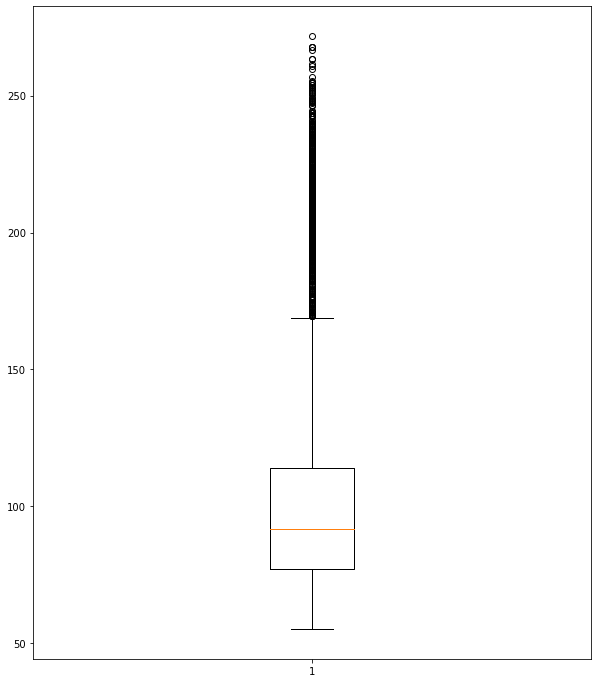

In [28]:
figure = plt.figure(figsize = (10,12))
plt.boxplot(df['avg_glucose_level'])
plt.show()

In [29]:
from scipy import stats

# Calculate the Z-scores of the feature
z = stats.zscore(df['avg_glucose_level'])
z
# Identify any outliers (Z-score greater than 3 or less than -3)
outliers = df[(z > 3) | (z < -3)]
outliers
# Handle the outlier rows
if len(outliers) > 0:
    df.loc[outliers.index, 'avg_glucose_level'] = df['avg_glucose_level'].mean()

#### hypertension

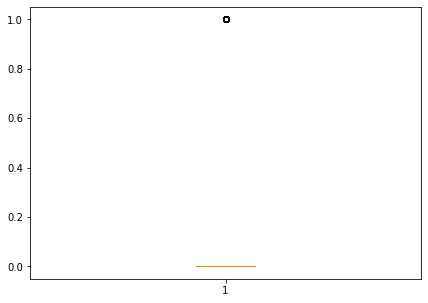

In [30]:
figure = plt.figure(figsize = (7,5))
plt.boxplot(df['hypertension'])
plt.show()

#### heart_disease

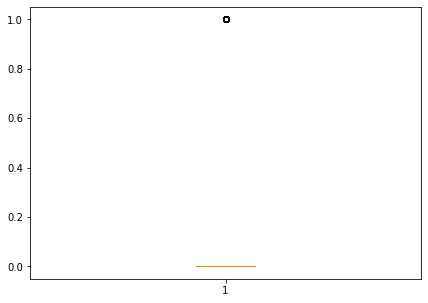

In [31]:
figure = plt.figure(figsize = (7,5))
plt.boxplot(df['heart_disease'])
plt.show()

#### bmi

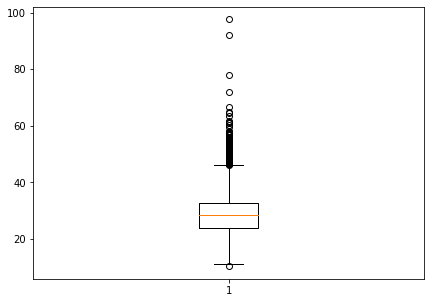

In [32]:
figure = plt.figure(figsize = (7,5))
plt.boxplot(df['bmi'])
plt.show()

In [33]:
# Calculate the Z-scores of the feature
z = stats.zscore(df['bmi'])
z
# Identify any outliers (Z-score greater than 3 or less than -3)
outliers = df['bmi'] > 90
# Handle the outlier rows
df.loc[outliers, 'bmi'] = df['bmi'].mean()

#### stroke

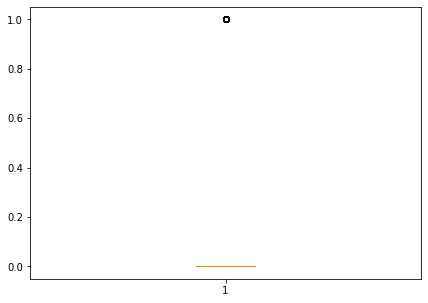

In [34]:
figure = plt.figure(figsize = (7,5))
plt.boxplot(df['stroke'])
plt.show()

### Label Encoding

#### smoking_status

In [35]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [36]:
replace_map_smokers = {'smoking status' : {'never smoked' : 0, 'formerly smoked' : 1, 'smokes' : 2, 'Unkown' : 3}}
labels = df['smoking_status'].astype('category').cat.categories.tolist()
replace_map_smokers_comp = {'smoking_status' : {k: v for k,v in zip(labels, list(range(1,len(labels)+1)))}}
# $ print(replace_map_comp)
# {'smoking_status': {'Unknown': 1, 'formerly smoked': 2, 'never smoked': 3, 'smokes': 4}}
df.replace(replace_map_smokers_comp,inplace=True)

In [37]:
df['smoking_status'].value_counts()

3    1892
1    1544
2     885
4     789
Name: smoking_status, dtype: int64

#### ever_married

In [38]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ever_married'] = le.fit_transform(df['ever_married']) # {'ever_married' : {'No' : 0, 'Yes : 1}}
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,228.69,36.600000,2,1
1,Female,61.0,0,0,1,Self-employed,202.21,28.893237,3,1
2,Male,80.0,0,1,1,Private,105.92,32.500000,3,1
3,Female,49.0,0,0,1,Private,171.23,34.400000,4,1
4,Female,79.0,1,0,1,Self-employed,174.12,24.000000,3,1


In [40]:
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

### One-Hot Encoding

In [41]:
one_hot_delay = pd.get_dummies(df['gender'],prefix='gender')
one_hot_work = pd.get_dummies(df['work_type'],prefix='_')
df = df.drop(['gender','work_type'], axis=1)
df = pd.concat([df,one_hot_delay,one_hot_work], axis=1)


In [42]:
df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,__Govt_job,__Never_worked,__Private,__Self-employed,__children
0,67.0,0,1,1,228.69,36.600000,2,1,0,1,0,0,0,1,0,0
1,61.0,0,0,1,202.21,28.893237,3,1,1,0,0,0,0,0,1,0
2,80.0,0,1,1,105.92,32.500000,3,1,0,1,0,0,0,1,0,0
3,49.0,0,0,1,171.23,34.400000,4,1,1,0,0,0,0,1,0,0
4,79.0,1,0,1,174.12,24.000000,3,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.893237,3,0,1,0,0,0,0,1,0,0
5106,81.0,0,0,1,125.20,40.000000,3,0,1,0,0,0,0,0,1,0
5107,35.0,0,0,1,82.99,30.600000,3,0,1,0,0,0,0,0,1,0
5108,51.0,0,0,1,166.29,25.600000,2,0,0,1,0,0,0,1,0,0


## Models & Results

### Decision Tree Classifier with Hold-out Validation

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = df.drop(['stroke'],axis=1)
target = df['stroke']
data_training, data_test, target_training, target_test = train_test_split(data,target, test_size=0.2, random_state=2021)
# print(data)
# print(target)
clf = DecisionTreeClassifier(criterion='gini', max_depth = 10,random_state=2021)
clf.fit(data_training,target_training)
## Store prediciton
predictions = clf.predict(data_test)

#### Results

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(target_test,predictions)

0.08317025440313111

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, predictions)

0.08317025440313111

In [46]:
mean_squared_error(target_test, predictions,squared=False)


0.28839253527636793

In [47]:
from sklearn.metrics import classification_report,plot_confusion_matrix

print(classification_report(target_test,predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.11      0.10      0.11        50

    accuracy                           0.92      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.92      0.91      1022



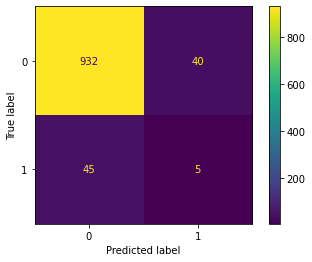

In [48]:
plot_confusion_matrix(clf,data_test,target_test)

### Decision Tree Classifier with Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
clf2 = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=2021)
scores = cross_val_score(clf2,data, target, cv=10)

#### Results

In [50]:
print(scores)
scores.mean()

[0.92563601 0.93542074 0.92367906 0.9334638  0.90410959 0.92759295
 0.9295499  0.93150685 0.93542074 0.93542074]


0.9281800391389432

### Logistic Regression with Hold-out Validation

In [51]:
from sklearn.linear_model import LogisticRegression


data_train, data_test, target_train, target_test  = train_test_split(data,target, test_size=0.30, random_state=2021)

logmodel1 = LogisticRegression(random_state=2021,solver='newton-cg',class_weight='balanced')
logmodel1.fit(data_train, target_train)

prediction1 = logmodel1.predict(data_test)


In [52]:
print(classification_report(target_test,prediction1))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1462
           1       0.11      0.66      0.19        71

    accuracy                           0.74      1533
   macro avg       0.54      0.70      0.52      1533
weighted avg       0.94      0.74      0.81      1533



#### Tuning

##### Bining age

/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


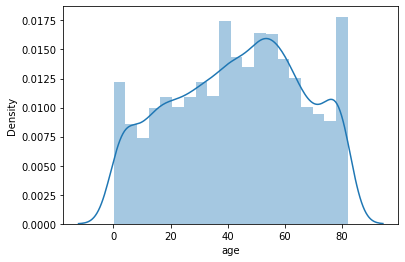

In [53]:
df_LR = df.copy()

sns.distplot(df_LR['age'])
plt.show()

In [54]:
estimator = preprocessing.KBinsDiscretizer(n_bins=4,strategy='quantile',encode='ordinal')
df_LR['age'] = estimator.fit_transform(df[['age']])
print(estimator.bin_edges_[0])
df_LR

[8.0e-02 2.5e+01 4.5e+01 6.1e+01 8.2e+01]


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,__Govt_job,__Never_worked,__Private,__Self-employed,__children
0,3.0,0,1,1,228.69,36.600000,2,1,0,1,0,0,0,1,0,0
1,3.0,0,0,1,202.21,28.893237,3,1,1,0,0,0,0,0,1,0
2,3.0,0,1,1,105.92,32.500000,3,1,0,1,0,0,0,1,0,0
3,2.0,0,0,1,171.23,34.400000,4,1,1,0,0,0,0,1,0,0
4,3.0,1,0,1,174.12,24.000000,3,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,3.0,1,0,1,83.75,28.893237,3,0,1,0,0,0,0,1,0,0
5106,3.0,0,0,1,125.20,40.000000,3,0,1,0,0,0,0,0,1,0
5107,1.0,0,0,1,82.99,30.600000,3,0,1,0,0,0,0,0,1,0
5108,2.0,0,0,1,166.29,25.600000,2,0,0,1,0,0,0,1,0,0


##### Factorize

In [55]:
df_LR['avg_glucose_level'] = pd.factorize(df_LR['avg_glucose_level'])[0] + 1

##### Testing again

In [56]:
data = df_LR.drop(['stroke'],axis=1)
target = df_LR['stroke']

data_train, data_test, target_train, target_test  = train_test_split(data,target, test_size=0.30, random_state=2021)

logmodel1 = LogisticRegression(random_state=2021,solver='newton-cg',class_weight='balanced')
logmodel1.fit(data_train, target_train)

prediction1 = logmodel1.predict(data_test)


In [57]:
print(classification_report(target_test,prediction1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1462
           1       0.53      0.99      0.69        71

    accuracy                           0.96      1533
   macro avg       0.76      0.97      0.83      1533
weighted avg       0.98      0.96      0.96      1533



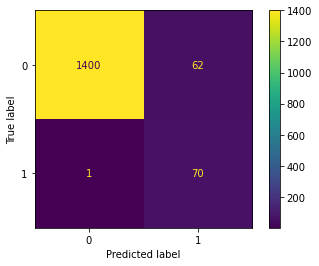

In [58]:
plot_confusion_matrix(logmodel1, data_test, target_test)


In this case, after the factorization of the feature 'avg_glucose_level', we get a big performance boost due to the compatibility of the Logistic Regression Model with factorization.

### Logistic Regression Model with Cross-Validation

In [59]:
logmodel1 = LogisticRegression(random_state=2021,solver='newton-cg',class_weight='balanced')
scores = cross_val_score(logmodel1,data, target, cv=10)

In [60]:
print(scores)
scores.mean()

[0.77299413 0.97260274 0.96477495 0.97651663 0.96868885 0.96086106
 0.97064579 0.98043053 0.96086106 0.97455969]


0.950293542074364

Tambem com Cross validation já obtemos bons scores.

### SVM Model with Hold-out Validation

In [71]:
from sklearn.svm import SVC



df_feat = df.drop(['stroke'],axis=1)
df_target = df['stroke']
data_train, data_test, target_train, target_test = train_test_split(df_feat, df_target, test_size=0.3, random_state=2021)

model = SVC(random_state=2021)
model.fit(data_train, target_train)
predictions = model.predict(data_test)


In [72]:
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Tuning

##### Factorization

In [73]:
df_SVM = df.copy()
df_SVM['avg_glucose_level'] = pd.factorize(df_LR['avg_glucose_level'])[0] + 1

data = df_SVM.drop(['stroke'],axis=1)
target = df_SVM['stroke']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=2021)

model = SVC(random_state=2021)
model.fit(data_train, target_train)
predictions = model.predict(data_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1462
           1       0.62      0.59      0.60        71

    accuracy                           0.96      1533
   macro avg       0.80      0.79      0.79      1533
weighted avg       0.96      0.96      0.96      1533



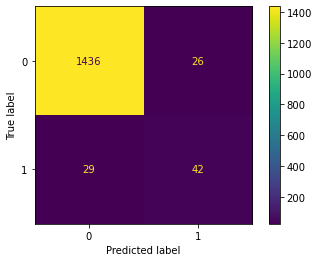

In [74]:
print(classification_report(target_test,predictions))
plot_confusion_matrix(model, data_test, target_test)

### SVN MODEL with Cross Validation

In [65]:
df_SVM = df.copy()
df_SVM['avg_glucose_level'] = pd.factorize(df_LR['avg_glucose_level'])[0] + 1

data = df_SVM.drop(['stroke'],axis=1)
target = df_SVM['stroke']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=2021)

model = SVC(random_state=2021)
scores = cross_val_score(model, data,target,cv=10)
print(scores)
scores.mean()

[0.97847358 0.98238748 0.97651663 0.99217221 0.98630137 0.97651663
 0.96086106 0.94129159 0.92172211 0.93737769]


0.965362035225049

### SVM Model using GridSearchCV & Hold-out Validation

In [66]:
from sklearn.model_selection import GridSearchCV

df_SVM_GSCV = df.copy()

data = df_SVM.drop(['stroke'],axis=1)
target = df_SVM['stroke']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=2021)

param_grid = {
    'C' : [0.1,1,10,100,1000], 
    'gamma' : ['scale','auto'],
    'kernel' : ['rbf'],
    'class_weight' : [None, "balanced"]
}

gridmodel= GridSearchCV(SVC(random_state=2021), param_grid,refit=True,verbose=3)
gridmodel.fit(data_train, target_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.951 total time=   0.1s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.951 total time=   0.1s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.950 total time=   0.1s
[CV 1/5] END C=0.1, class_weight=None, gamma=auto, kernel=rbf;, score=0.950 total time=   0.7s
[CV 2/5] END C=0.1, class_weight=None, gamma=auto, kernel=rbf;, score=0.950 total time=   0.7s
[CV 3/5] END C=0.1, class_weight=None, gamma=auto, kernel=rbf;, score=0.951 total time=   0.7s
[CV 4/5] END C=0.1, class_weight=None, gamma=auto, kernel=rbf;, score=0.951 total time=   0.5s
[CV 5/5] END C=0.1, class_weight=None, gamma=auto, kernel=rbf;, score=0.950 to

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             verbose=3)

In [67]:
gridmodel.best_params_

{'C': 1000, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

In [68]:
gridmodel.best_estimator_

SVC(C=1000, random_state=2021)

In [69]:
grid_predictions = gridmodel.predict(data_test)
print(classification_report(target_test,grid_predictions))
print(gridmodel)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1462
           1       0.71      0.85      0.77        71

    accuracy                           0.98      1533
   macro avg       0.85      0.91      0.88      1533
weighted avg       0.98      0.98      0.98      1533

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             verbose=3)


In [70]:
from sklearn.metrics import precision_score
print(precision_score(target_test, grid_predictions,pos_label=0))

0.9924085576259489


- gridmodel= GridSearchCV(SVC(random_state=2021,C=1000), param_grid,refit=True,verbose=3)
- gridmodel.fit(data_train, target_train

Os resultados demonstrados acima são Resultado da execução com este estimator. 
